# How to Improve Class Imbalance using Class Weights in Machine Learning

* https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/?

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [47]:
# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [48]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [49]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


In [50]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [51]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [52]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [53]:
cat_cols = ['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
con_cols = ["Age","avg_glucose_level","bmi"]
target_col = ["stroke"]

print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
The continuous cols are :  ['Age', 'avg_glucose_level', 'bmi']
The target variable is :   ['stroke']


In [54]:
data['bmi'] = pd.cut(x=data['bmi'], bins=[0, 18.4, 24.9, 29.9, 100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_cols = ["gender", "hypertension", "heart_disease", "ever_married", "Residence_type", "stroke", "bmi"]

for col in label_cols:
    data[col]= label_encoder.fit_transform(data[col])

data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,1,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,2,never smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,1,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,1,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,2,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,1,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,1,never smoked,0
5108,37544,1,51.0,0,0,1,Private,0,166.29,2,formerly smoked,0


In [56]:
counter = Counter(data['stroke'])
counter, counter[1]/(counter[0] + counter[1])

(Counter({1: 249, 0: 4861}), 0.0487279843444227)

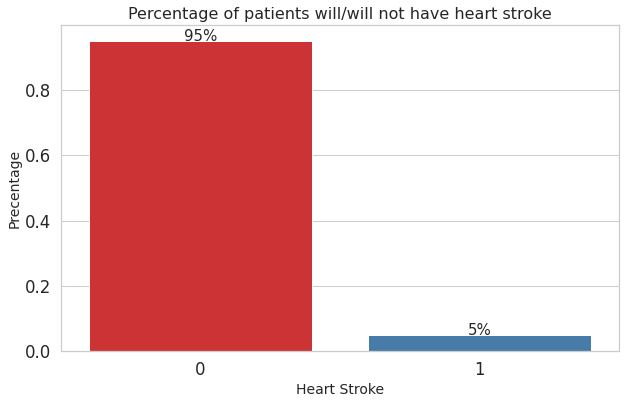

In [57]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
g = sns.barplot(data['stroke'], data['stroke'], palette='Set1', estimator=lambda x: len(x) / len(data) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Heart Stroke', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Percentage of patients will/will not have heart stroke', fontsize=16)
plt.show()

In [58]:
df= pd.get_dummies(data)

x = df.drop('stroke', axis=1)
y = df['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [66]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,1,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,2,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,1,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,1,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,2,0,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,1,0,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,1,0,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,2,0,0,0,1,0,0,0,1,0,0


The accuracy for mode model is: 0.9419439008480104
The f1 score for the model model is: 0.0


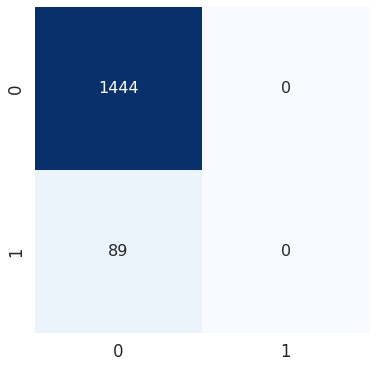

In [59]:
pred_test = []
for i in range (len(y_test)):
    pred_test.append(y_train.mode()[0])

#Printing f1 and accuracy scores    
print('The accuracy for mode model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the model model is:',f1_score(y_test, pred_test))

#Ploting the cunfusion matrix
conf_matrix(y_test, pred_test)

### 1. Simple Logistic Regression

The f1 score for the testing data: 0.02222222222222222


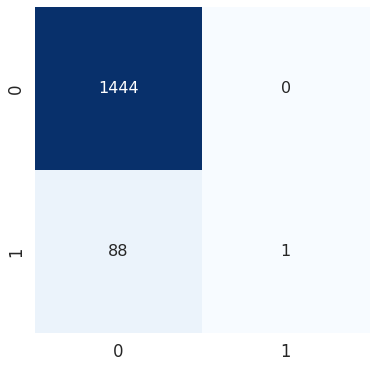

In [60]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train, y_train)

# Predicting on the test data
pred_test = lr.predict(x_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Calling function 
conf_matrix(y_test, pred_test)

### 2. Logistic Regression (class_weight='balanced')

The f1 score for the testing data: 0.25581395348837216


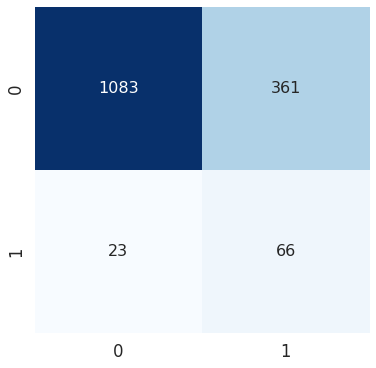

: 

In [68]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
# lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)

# Predicting on the test data
pred_test = lr.predict(x_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

### 3. Logistic Regression (manual class weights)

In [64]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0, 0.99, 200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=0).fit(x_train, y_train)

/home/nam/miniconda3/envs/sklearn/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/nam/miniconda3/envs/sklearn/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/nam/miniconda3/envs/sklearn/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/nam/miniconda3/envs/sklearn/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/nam/miniconda3/envs/sklearn/lib/python3.9/site-packages/scipy/optimize

Text(0.5, 1.0, 'Scoring for different class weights')

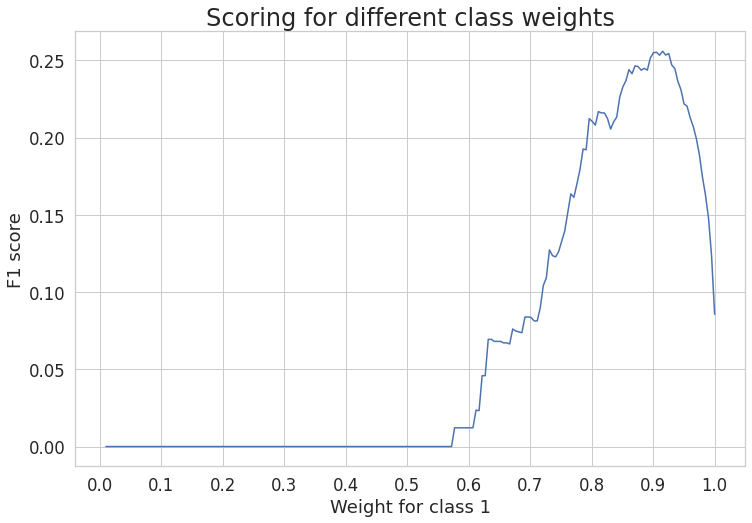

In [65]:
#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)